Gourav Verma<br>
Week 9-10<br>
Heat maps, Spatial charts, and contour charts

In [21]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import plotly.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.offline as plo
import squarify

In [22]:
# Read world population data

costco = pd.read_csv('costcos-geocoded.csv')
ppg = pd.read_csv('ppg2008.csv')

# summarize statewide Costco store count

costco_sum = pd.Series.to_frame(costco.groupby('State')['Address'].count())
costco_sum = costco_sum.rename({'Address':'store_count'}, axis=1, inplace=False)
costco_sum = pd.DataFrame(costco_sum.to_records())

##### Heat Map

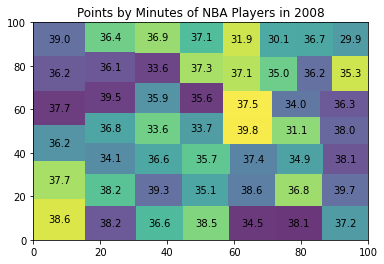

In [24]:
squarify.plot(sizes=ppg['PTS'], label=ppg['MIN'], alpha=0.8)
plt.title('Points by Minutes of NBA Players in 2008')
plt.show()

In [14]:
# plot the costco store count across US states

data=[dict(type='choropleth', autocolorscale = False,
           locations=costco_sum['State'], z=costco_sum['store_count'], 
           locationmode='USA-states', colorscale='YlOrRd', 
           colorbar=dict(title='Store Count'))]

layout = dict(title='Costco Store Count',
              geo=dict(scope='usa', projection=dict(type='albers usa'), 
                       showlakes=True, lakecolor='rgb(66,165,245)'))

fig=dict(data=data, layout=layout)

plo.plot(fig)

'temp-plot.html'

##### Contor Plot

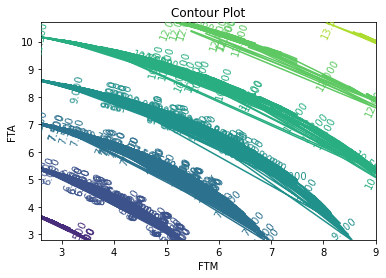

In [15]:
%matplotlib inline

# define function

def f(x, y):
    """
    Args:
        two numpy arrays (x, y)
    Returns:
        square root of sum of square of x and y
    """
    return np.sqrt(x**2 + y**2)

x = np.array(ppg['FTM'])
y = np.array(ppg['FTA'])

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure()
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Contour Plot')
plt.xlabel('FTM')
plt.ylabel('FTA')
plt.show()